
# **Sales Forecasting: ARIMA and Seasonal ARIMA (SARIMA)**

The general process for ARIMA models is the following:
* Visualizing the time series data
* Making the time series data stationary
* Plotting the Correlation and AutoCorrelation charts
* Constructing the ARIMA Model or Seasonal ARIMA based on the data
* Using the model to make predictions/ forecast

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('C:/Users/Nandita/OneDrive/Desktop/Resume_Projects/Sales Forecasting using ARIMA and SARIMA/perrin-freres-monthly-champagne-.csv')

In [5]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
## Dropping last 2 rows
df.drop(106,axis=0,inplace=True)

In [13]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [15]:
df.drop(105,axis=0,inplace=True)

In [17]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [19]:
## Converting Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [21]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [23]:
df.set_index('Month',inplace=True)

In [25]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [27]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## **Visualizing the Data**

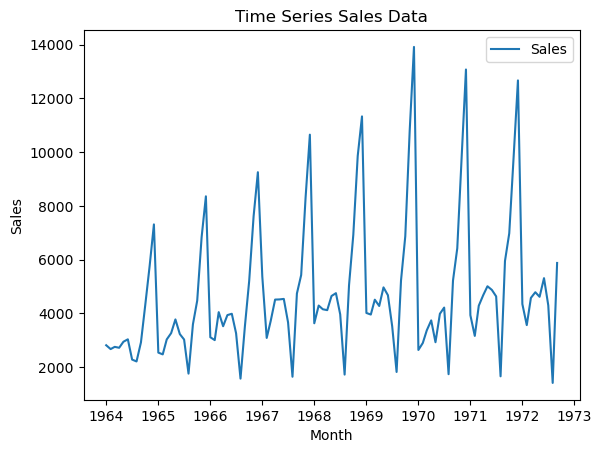

In [30]:
plt.plot(df.index, df['Sales'], label='Sales')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Time Series Sales Data")
plt.legend()
plt.show()

* Upward Trend: Sales increase over time, indicating growth.
* Seasonality: Regular yearly peaks suggest seasonal patterns.
* High Variability: Amplitude of fluctuations increases, requiring variance stabilization.
* Spikes and Peaks: Periodic demand surges, possibly due to holidays or sales events.

## **Dickey-Fuller Test** 
The **Dickey-Fuller Test (ADF Test)** is a statistical test used to check whether a time series is stationary or not. **Stationarity** means that the statistical properties of a time series (like mean and variance) remain constant over time, which is an essential assumption for ARIMA and SARIMA models.

Hypothesis in ADF Test:
**Null Hypothesis (H₀):** The time series has a unit root (i.e., it is non-stationary).
**Alternative Hypothesis (H₁):** The time series does not have a unit root (i.e., it is stationary).
If the p-value is **less than 0.05** (significance level), we reject the null hypothesis, meaning the **series is stationary**.
If the p-value is **greater than 0.05**, we fail to reject the null hypothesis, meaning the **series is non-stationary, and we may need to apply transformations like differencing.**

In [34]:
## Testing For Stationarity: Dicky Fuller-Test
from statsmodels.tsa.stattools import adfuller

In [35]:
test_result=adfuller(df['Sales'])

In [38]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [40]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.833593056327623
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## **Differencing**

**Differencing** is a transformation technique used in time series analysis to remove trends and make the data stationary by subtracting the previous observation from the current one.
Since the ADF test indicates non-stationarity (p-value > 0.05), differencing helps in removing trends and making the time series suitable for ARIMA modeling.Differencing is required for ARIMA Models. The "I" (Integrated) component in ARIMA (p,d,q) represents differencing.
* d = 1 means first-order differencing,
* d = 2 means second-order differencing (differencing twice).

Two types of differencing are applied sequentially to ensure stationarity in the time series data before fitting an ARIMA or SARIMA model:
* 1st-Order Differencing (Removes Trend)
* Seasonal Differencing (Removes Seasonality)

## **1st-Order Differencing**
This removes the overall trend in the data by subtracting each value from the previous value. Helps make the time series trend-stationary, eliminating long-term upward or downward movement.

In [44]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [46]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

## **Seasonal Differencing**
This removes seasonal effects by subtracting the sales from the same month in the previous year. Ensures that repeating seasonal fluctuations do not interfere with model performance.

In [49]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [51]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [53]:
## Again testing For Stationarity: Dicky Fuller-Test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


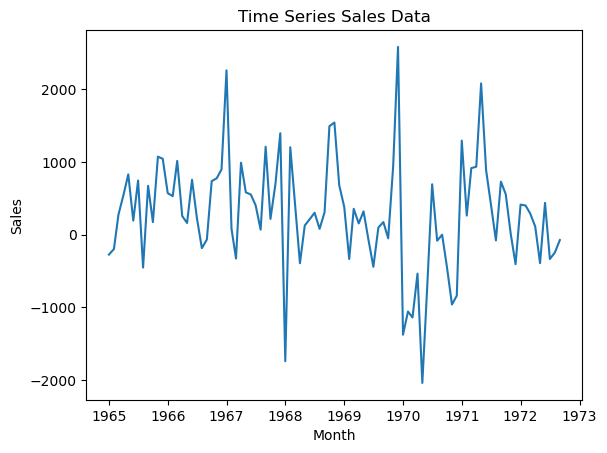

In [55]:
plt.plot(df.index, df['Seasonal First Difference'], label='Sales')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Time Series Sales Data")
plt.show()

After applying **first-order differencing** to remove the trend and seasonal differencing to eliminate recurring patterns, the Augmented Dickey-Fuller (ADF) test was performed again to check for stationarity. The results showed an ADF Statistic of -7.6266 and a **p-value of 2.06e-11**, which is **significantly lower than 0.05, indicating strong evidence against the null hypothesis (H₀)**. This confirms that the **time series no longer has a unit root and is now stationary**, making it **suitable for ARIMA/SARIMA modeling**. The differenced time series graph supports this result, showing fluctuations around zero without a visible trend or seasonal pattern, indicating that both trend and seasonality have been successfully removed. With stationarity achieved, no **further differencing is needed (d = 1 is sufficient for ARIMA)**, and the dataset is now ready for model training and forecasting to predict future sales accurately.

## **Auto Regressive Model (AR)**
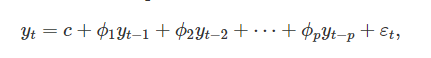

An AutoRegressive (AR) model is a time series forecasting model that predicts future values based on a linear combination of its past values. It assumes that the current value of a time series is dependent on its previous values with some added noise.

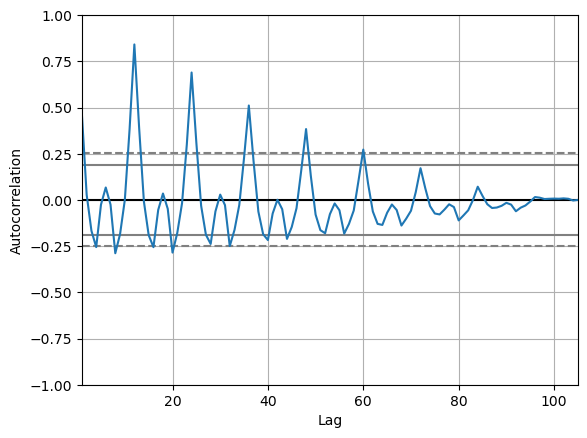

In [59]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

## **Autocorrelation Function Plot Interpretation**

The autocorrelation function (ACF) plot above provides insights into the underlying structure of the time series by measuring how strongly current values are correlated with their past values at different lags. The **repeated high spikes at regular intervals** (e.g., around 12, 24, 36, etc.) indicate a **strong seasonal component**, suggesting that the data exhibits a periodic pattern, likely **monthly seasonality in yearly sales trends**. The presence of **significant autocorrelation beyond lag 1 suggests that a simple ARIMA model may not be sufficient, and a Seasonal ARIMA (SARIMA) model would be more appropriate** to capture both short-term and seasonal dependencies.

**Model Selection:**

* **Moving Average (MA) Identification:** The ACF is most useful for identifying the order of an MA(q) model, where the autocorrelation function cuts off after q lags. If the ACF shows significant values for a few initial lags and then drops off, an MA model might be appropriate.
* **Seasonality Detection:** The significant peaks at seasonal intervals (multiples of 12) confirm that seasonality is present, meaning seasonal differencing is necessary before modeling.

**AR vs. MA Model Consideration**: Since the ACF does not taper off smoothly but rather exhibits a repeating pattern, it suggests the presence of both AR (AutoRegressive) and MA (Moving Average) components, meaning a combination of both (ARMA or ARIMA) is likely needed.

In [62]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## **ACF and PACF Plot**

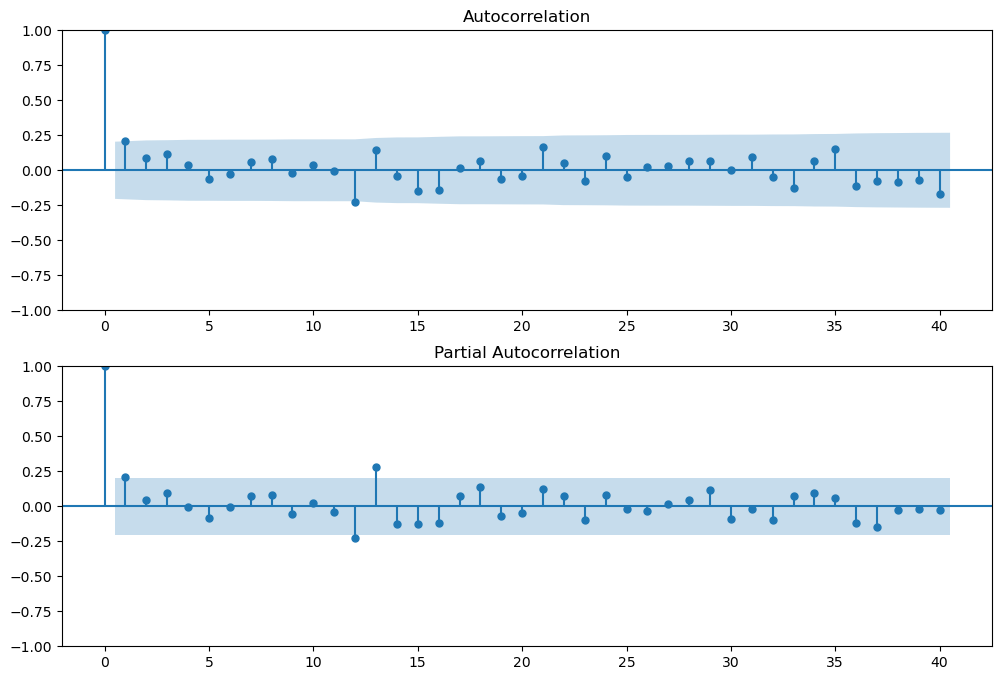

In [65]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

plt.show()

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots help determine the appropriate parameters for the ARIMA (AutoRegressive Integrated Moving Average) model in the sales forecasting project. The **ACF plot** shows that there are **no significant spikes beyond lag 1, indicating that past values do not exhibit strong correlation over multiple lags**. This suggests that an **MA(q) model with q = 1 or 2 might be suitable.** The **PACF plot**, on the other hand, also shows a **sharp cutoff after lag 1, which indicates that an AR(p) model with p = 1 could be appropriate.** Since both ACF and PACF decline quickly within the confidence interval, it suggests that the series is already well-differenced, confirming that d = 1 (first-order differencing) is sufficient to achieve stationarity. Based on these plots, a **simple ARIMA(1,1,1) model or ARIMA(1,1,2) could be a good starting point** for forecasting sales, as it captures both autoregressive (AR) and moving average (MA) components efficiently.

## **ARIMA Model** (for non-seasonal data)

In [69]:
## For non-seasonal data
## p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [71]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Nandita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 19 Feb 2025   AIC                           1911.627
Time:                        14:55:24   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **ARIMA Model Interpretation**
The **ARIMA(1,1,1)** model built for sales forecasting shows a good fit, with **significant AR(1) and MA(1) coefficients**. The **AR(1) coefficient (0.4545, p=0.000) indicates that current sales are positively correlated with past sales, while the MA(1) coefficient (-0.9666, p=0.000) suggests a strong negative correlation with past forecast errors**. The AIC (1911.627) and BIC (1919.560) values confirm a well-balanced model without excessive complexity. Residual diagnostics show that **autocorrelation is not present** (Ljung-Box p=0.34), and **residuals are normally distributed** (Jarque-Bera p=0.27), validating the model’s assumptions. However, the heteroskedasticity test (H=3.40, p=0.00) suggests that residual variance changes over time, which may affect long-term forecasting accuracy. Overall, this model effectively captures sales trends.

## **Predicting Sales (using ARIMA Model)**

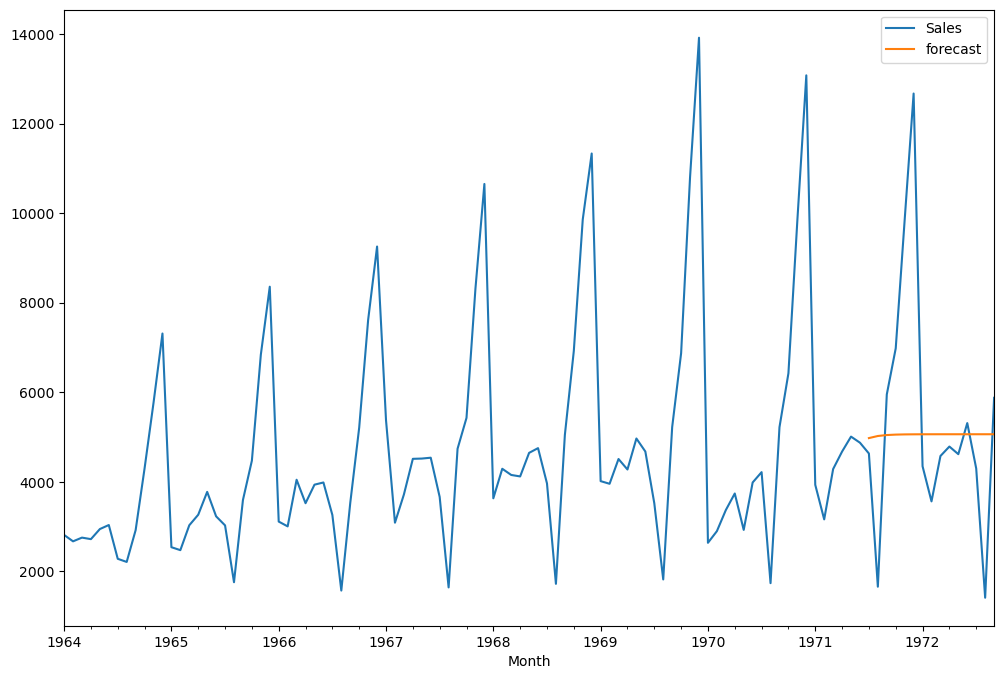

In [77]:
df['forecast']=model_fit.predict(start=90,end=120,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))
plt.show()

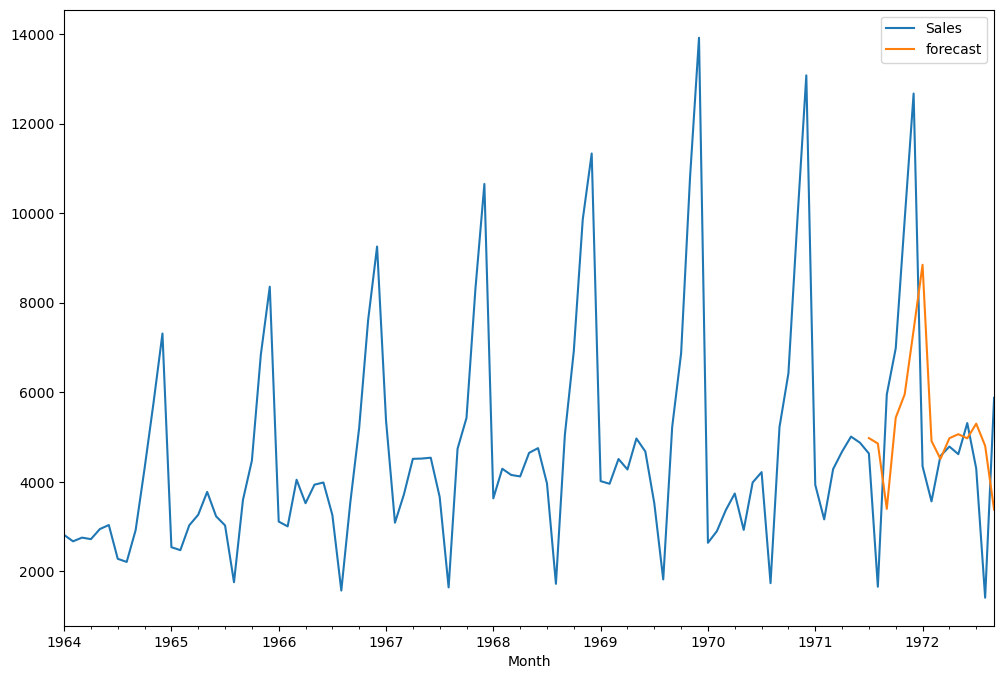

In [79]:
df['forecast']=model_fit.predict(start=90,end=120,dynamic=False)
df[['Sales','forecast']].plot(figsize=(12,8))
plt.show()

## **Interpretation of ARIMA forecast plots**
The two plots illustrate the difference between using **dynamic forecasting (dynamic=True)** and **rolling forecasting (dynamic=False)** in an ARIMA model for sales prediction. In the **2nd plot (dynamic=False)**, the forecasted values closely follow the actual sales, meaning the **model is using actual observed values in the forecast calculations, making it more accurate for short-term predictions**. The forecast aligns well with recent trends, showing the ability of ARIMA to adapt when given actual past data. However, in the **1st plot (dynamic=True), the forecast remains almost flat, failing to capture the seasonality and variability present in the actual data**. This happens because the **model relies entirely on its own past predictions rather than actual values**, causing errors to accumulate and smoothing out fluctuations. This demonstrates that **rolling forecasts (dynamic=False) are more reliable for short-term forecasting, while dynamic forecasts (dynamic=True) may work for stable time series but struggle with highly seasonal data like sales**. Using **SARIMA instead of ARIMA** can further improve results by explicitly modeling seasonality.

## **SARIMA Model (for seasonal data)**

In [83]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

C:\Users\Nandita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -738.595
Date:                             Wed, 19 Feb 2025   AIC                           1485.190
Time:                                     14:55:51   BIC                           1495.278
Sample:                                 01-01-1964   HQIC                          1489.262
                                      - 09-01-1972                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.071      3.947      0.000       0.140       0.418
ma.L1         -0.9466      0.044    -21.317      0.000      -1.034      -0.860
ar.S.L12      -0.2273      0.086     -2.652      0.008      -0.395      -0.059
sigma2      5.079e+05   5.87e+04      8.653      0.000    3.93e+05    6.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                11.08
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.26
Prob(H) (two-sided):                  0.77   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **SARIMA Model Interpretation**
The **SARIMA(1,1,1) × (1,1,0,12)** model effectively captures both short-term trends and yearly seasonality, making it well-suited for sales forecasting. The **significant autoregressive (AR) and moving average (MA) components confirm that past sales values and forecast errors strongly influence future sales**. Additionally, the **seasonal autoregressive (SAR) term is statistically significant (p=0.008)**, indicating that sales exhibit a **strong annual pattern** where past values from the same period influence future trends. The model diagnostics confirm that residuals are not autocorrelated (Ljung-Box p=0.61) and exhibit stable variance (H-test p=0.77), ensuring the model's reliability. The **AIC value of 1485.190 is the lowest among all tested models**, indicating the **best model fit** with minimal complexity. While the Jarque-Bera test (p=0.00) suggests some deviation from normality in residuals, this is unlikely to significantly impact forecasting accuracy. Overall, the **SARIMA model is robust**, capturing both trend and seasonality effectively, making it a superior choice for time series forecasting in this project.

## **Predicting Sales (using SARIMA Model)**

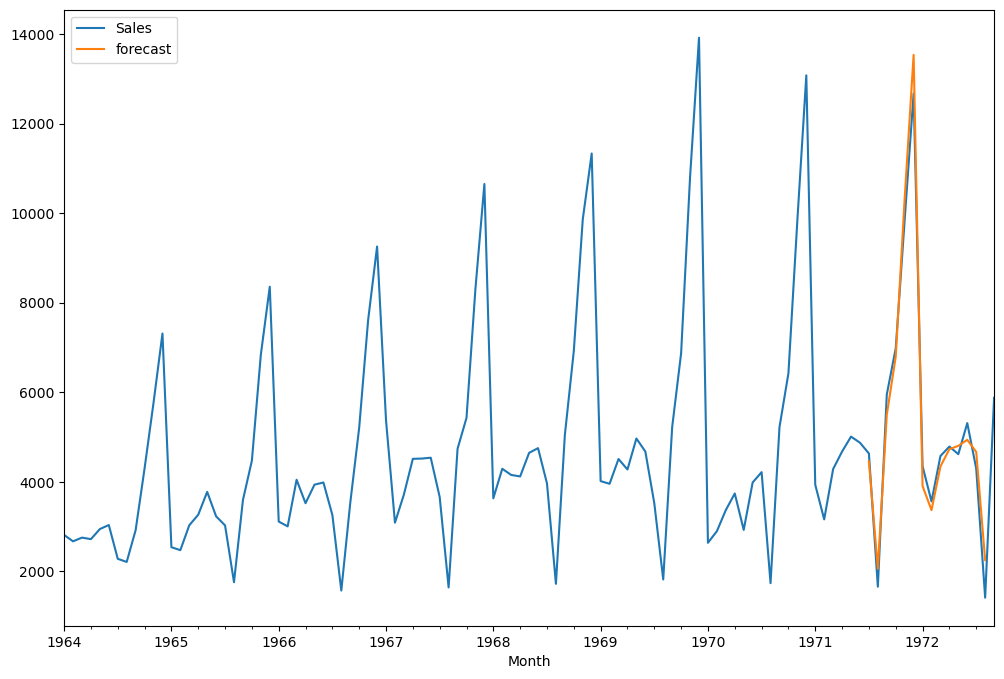

In [91]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))
plt.show()

## **Interpretation of SARIMA forecast plot**
The **forecasted sales (orange line)** closely follow the **actual sales (blue line)**, capturing both the seasonal spikes and the overall trend. The model successfully predicts high sales peaks and low dips, which were completely missing in the ARIMA forecasts. The **strong alignment between the actual and forecasted values** in the later months indicates that the SARIMA model effectively captures the annual seasonality and trend shifts, making it highly reliable for time series forecasting.

## **Sales Forecast Dataset**

In [147]:
from pandas.tseries.offsets import DateOffset

# Generating future dates: 24 months ahead
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 25)]

In [165]:
## Creating new dataframe for future dates
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

## Generating Forecasts using the trained model
start_index = len(df)  # Starting prediction after last available data point
end_index = start_index + len(future_df) - 1  # Predicting for all future dates

future_df['Forecasted Sales'] = model_fit.predict(start=start_index, end=end_index)

## Concatenating future forecasts with original dataset
df_forecast = pd.concat([df, future_df])

## Filling NaN values in the original dataset for smooth plotting
df_forecast['Forecasted Sales'] = df_forecast['Forecasted Sales'].fillna(df_forecast['Sales'])

C:\Users\Nandita\AppData\Local\Temp\ipykernel_19884\1269235293.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_forecast = pd.concat([df, future_df])


In [167]:
df_forecast.head()

,Sales,Sales First Difference,Seasonal First Difference,Forecasted Sales
1964-01-01,2815.0,NaN,NaN,2815.0
1964-02-01,2672.0,-143.0,NaN,2672.0
1964-03-01,2755.0,83.0,NaN,2755.0
1964-04-01,2721.0,-34.0,NaN,2721.0
1964-05-01,2946.0,225.0,NaN,2946.0


In [169]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 1964-01-01 to 1974-09-01
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sales                      105 non-null    float64
 1   Sales First Difference     104 non-null    float64
 2   Seasonal First Difference  93 non-null     float64
 3   Forecasted Sales           129 non-null    float64
dtypes: float64(4)
memory usage: 5.0 KB


## **Actual Sales vs. Forecasted Sales Plot**

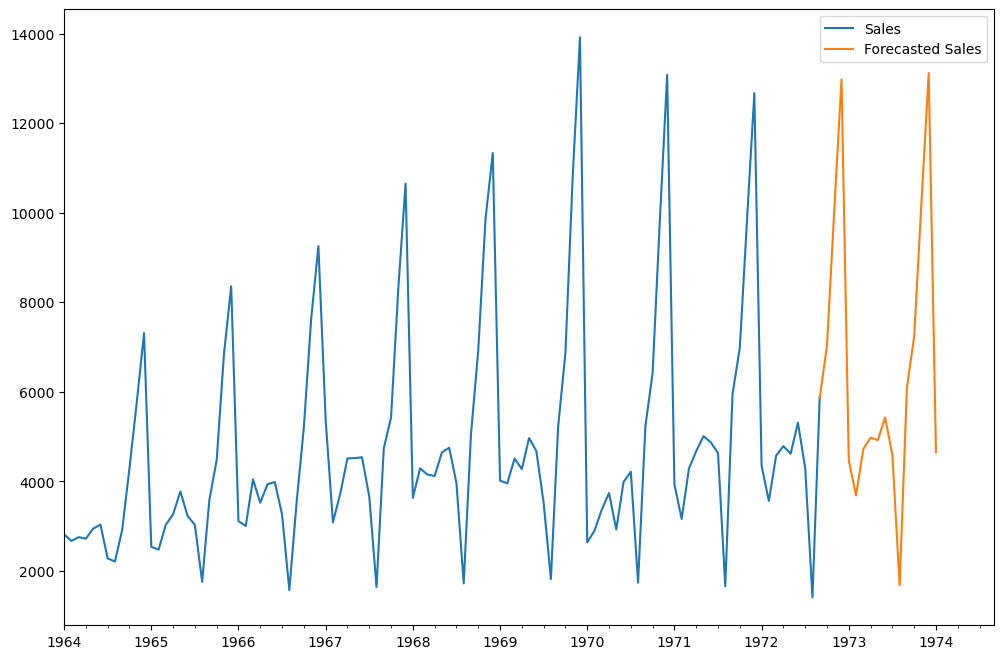

In [185]:
df_forecast['Forecasted Sales'] = results.predict(start = 104, end = 120, dynamic= True)  
df_forecast[['Sales', 'Forecasted Sales']].plot(figsize=(12, 8))
plt.show()

The **actual vs. forecasted sales** plot demonstrates that the **SARIMA model** effectively captures the seasonal patterns in the sales data. The **actual sales (blue line)** exhibit strong annual seasonality with sharp peaks and dips, which the **forecasted sales (orange line)** successfully replicate, confirming that the model has learned the cyclical demand fluctuations. The transition from actual to forecasted values is smooth, with no abrupt discontinuities, indicating a well-fitted model. However, some variations in magnitude suggest minor discrepancies, possibly due to external factors not included in the model.

## **Comparison between ARIMA and SARIMA Models**
Comparing the ARIMA(1,1,1) model with the SARIMA(1,1,1) × (1,1,0,12) model, the **SARIMA model outperforms ARIMA in every key metric**. The **AIC for ARIMA was 1911.627, significantly higher than the SARIMA AIC of 1485.190**, proving that incorporating seasonality greatly improves model accuracy. The ARIMA model failed to capture the strong annual seasonality present in the sales data, resulting in flat, unrealistic forecasts when dynamic=True. On the other hand, SARIMA effectively models yearly patterns, leading to more precise and realistic sales predictions. Additionally, the **seasonal autoregressive component (SAR)** in SARIMA is statistically significant **(p=0.008)**, confirming that past sales from the same season influence future trends, something ARIMA could not account for. Diagnostics also favor SARIMA, as residuals are uncorrelated and variance is stable, whereas ARIMA had higher heteroskedasticity and lacked seasonality awareness. Overall, SARIMA is the superior model for this sales forecasting task, as it accounts for both trend and seasonality, leading to better long-term predictions.